Matrial Original de

Domingo Mery - Department of Computer Science - Universidad Católica de Chile

# Color enhancemente using Equalization

1. Take color image

2. Conversion RGB to HSV

3. Equalize V channel only!

4. Conversion HSV to RGB


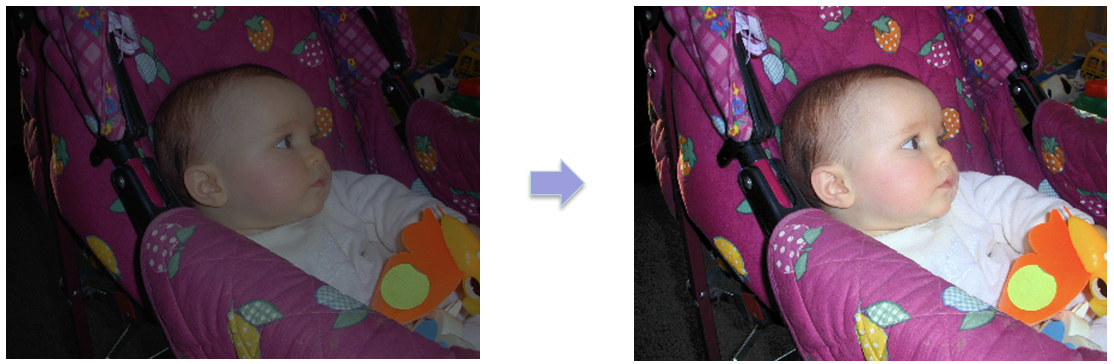

In [4]:
!curl -L -o valeria.png https://www.dropbox.com/s/v2qdaolqds93kx0/valeria.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   119  100   119    0     0    407      0 --:--:-- --:--:-- --:--:--   410

100    17  100    17    0     0     21      0 --:--:-- --:--:-- --:--:--    21
100    17  100    17    0     0     21      0 --:--:-- --:--:-- --:--:--     0

100  182k  100  182k    0     0   124k      0  0:00:01  0:00:01 --:--:--  124k


In [5]:
def imhist3(X):
  (N,M,P) = X.shape
  n = 256
  for p in range(3):
    h = np.zeros((256,))
    for i in range(N):
      for j in range(M):
        x = X[i,j,p]
        h[x] = h[x]+1
    plt.figure(figsize=(30,9))
    plt.bar(range(n),h[0:n])
    plt.title('channel '+str(p))
    plt.show()


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Original Image (dark)

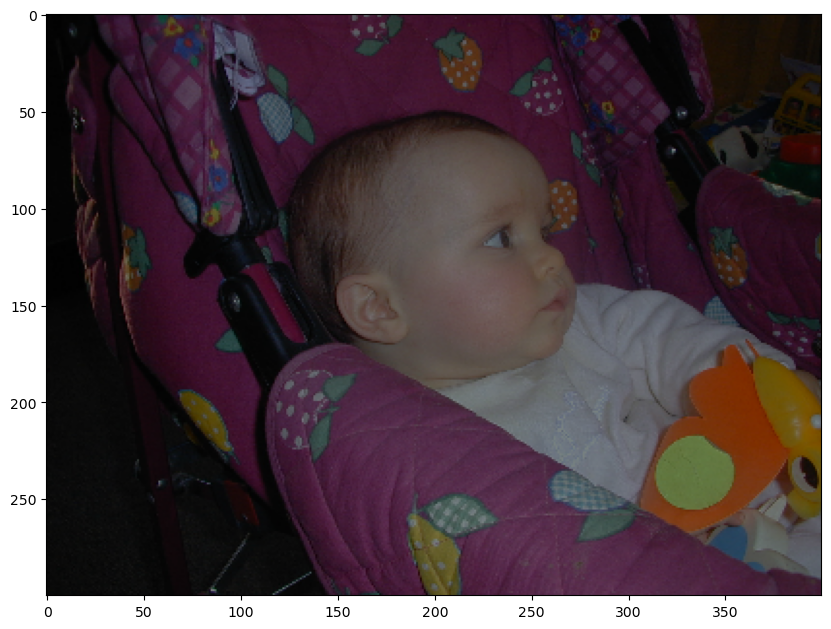

In [7]:
I = cv2.imread('valeria.png')
plt.figure(figsize=(10,12))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.show()

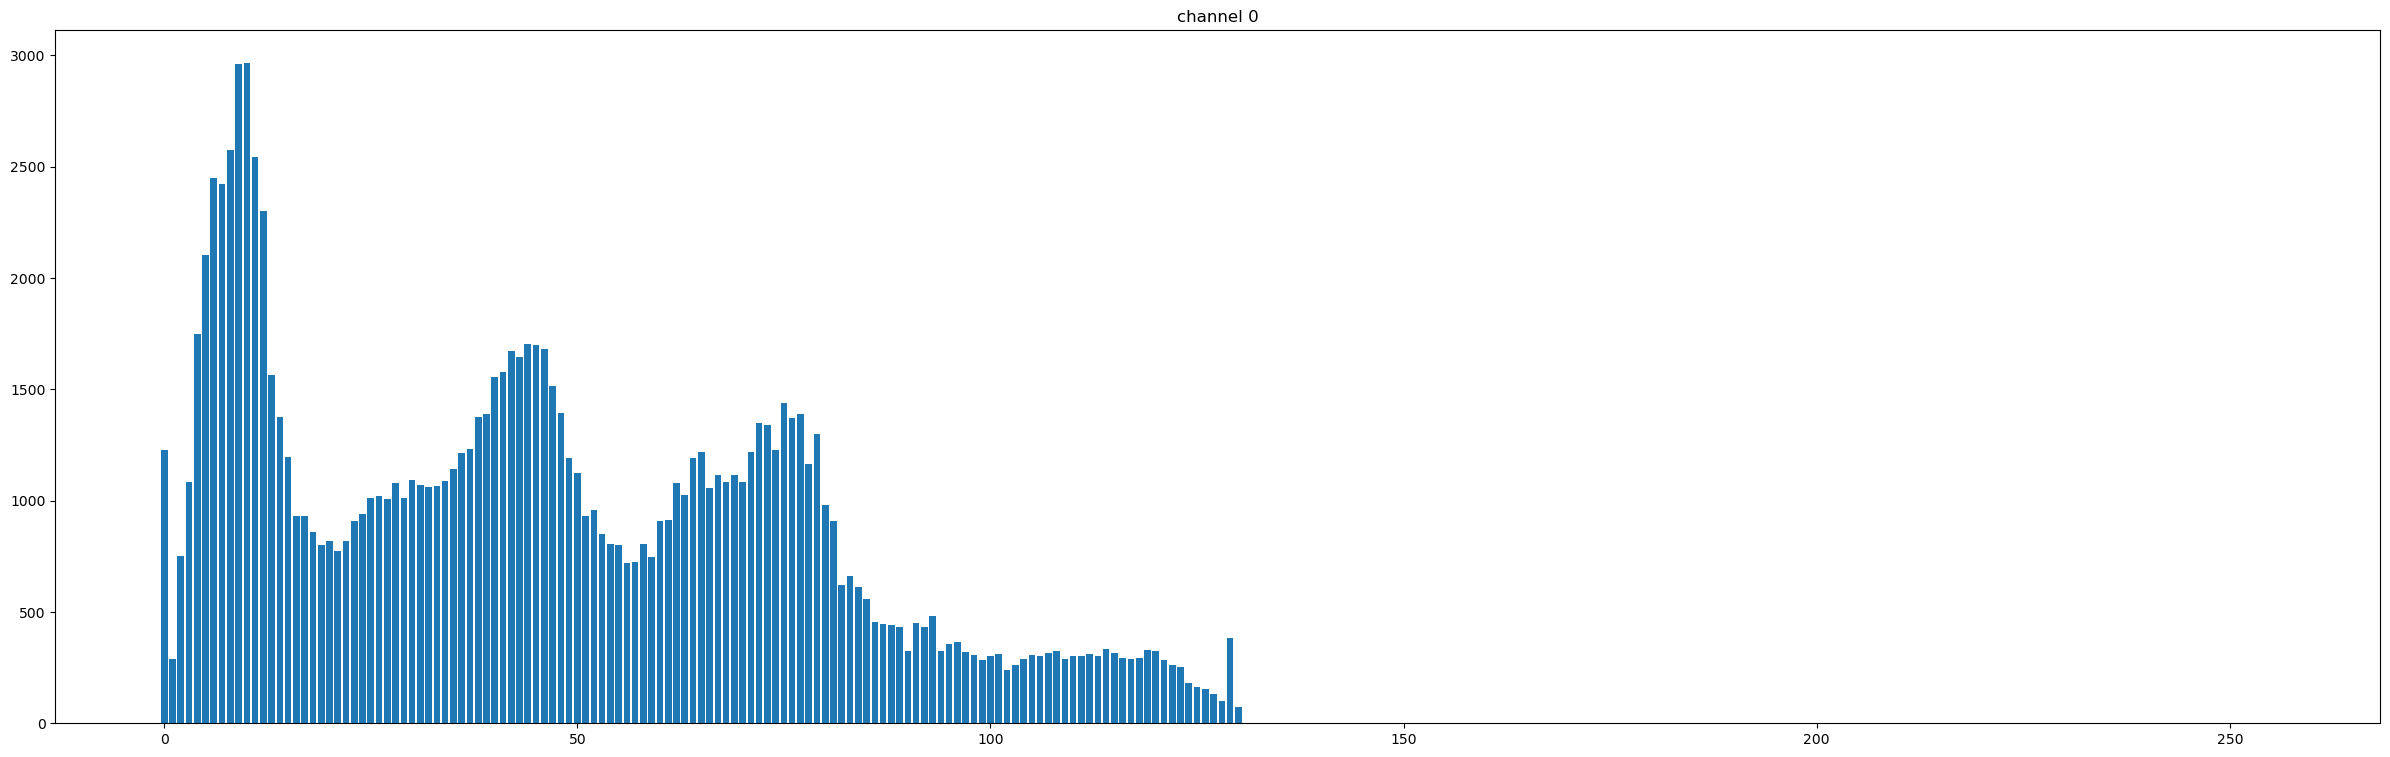

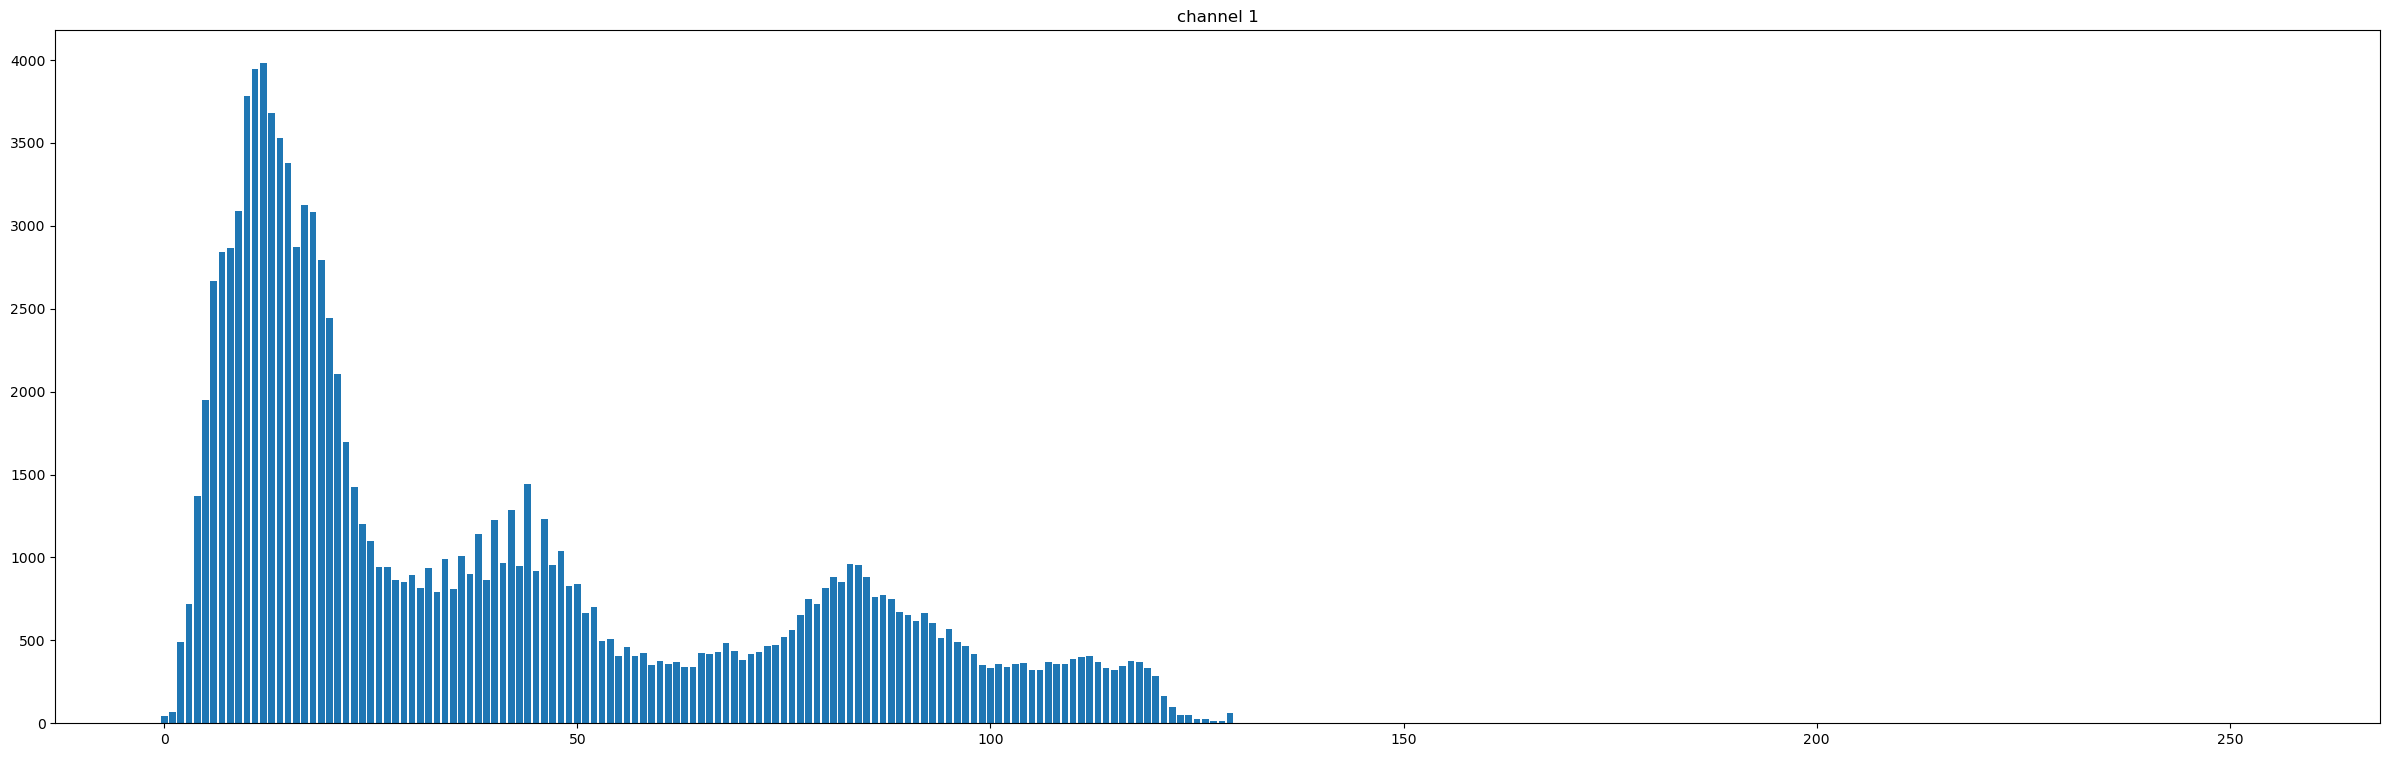

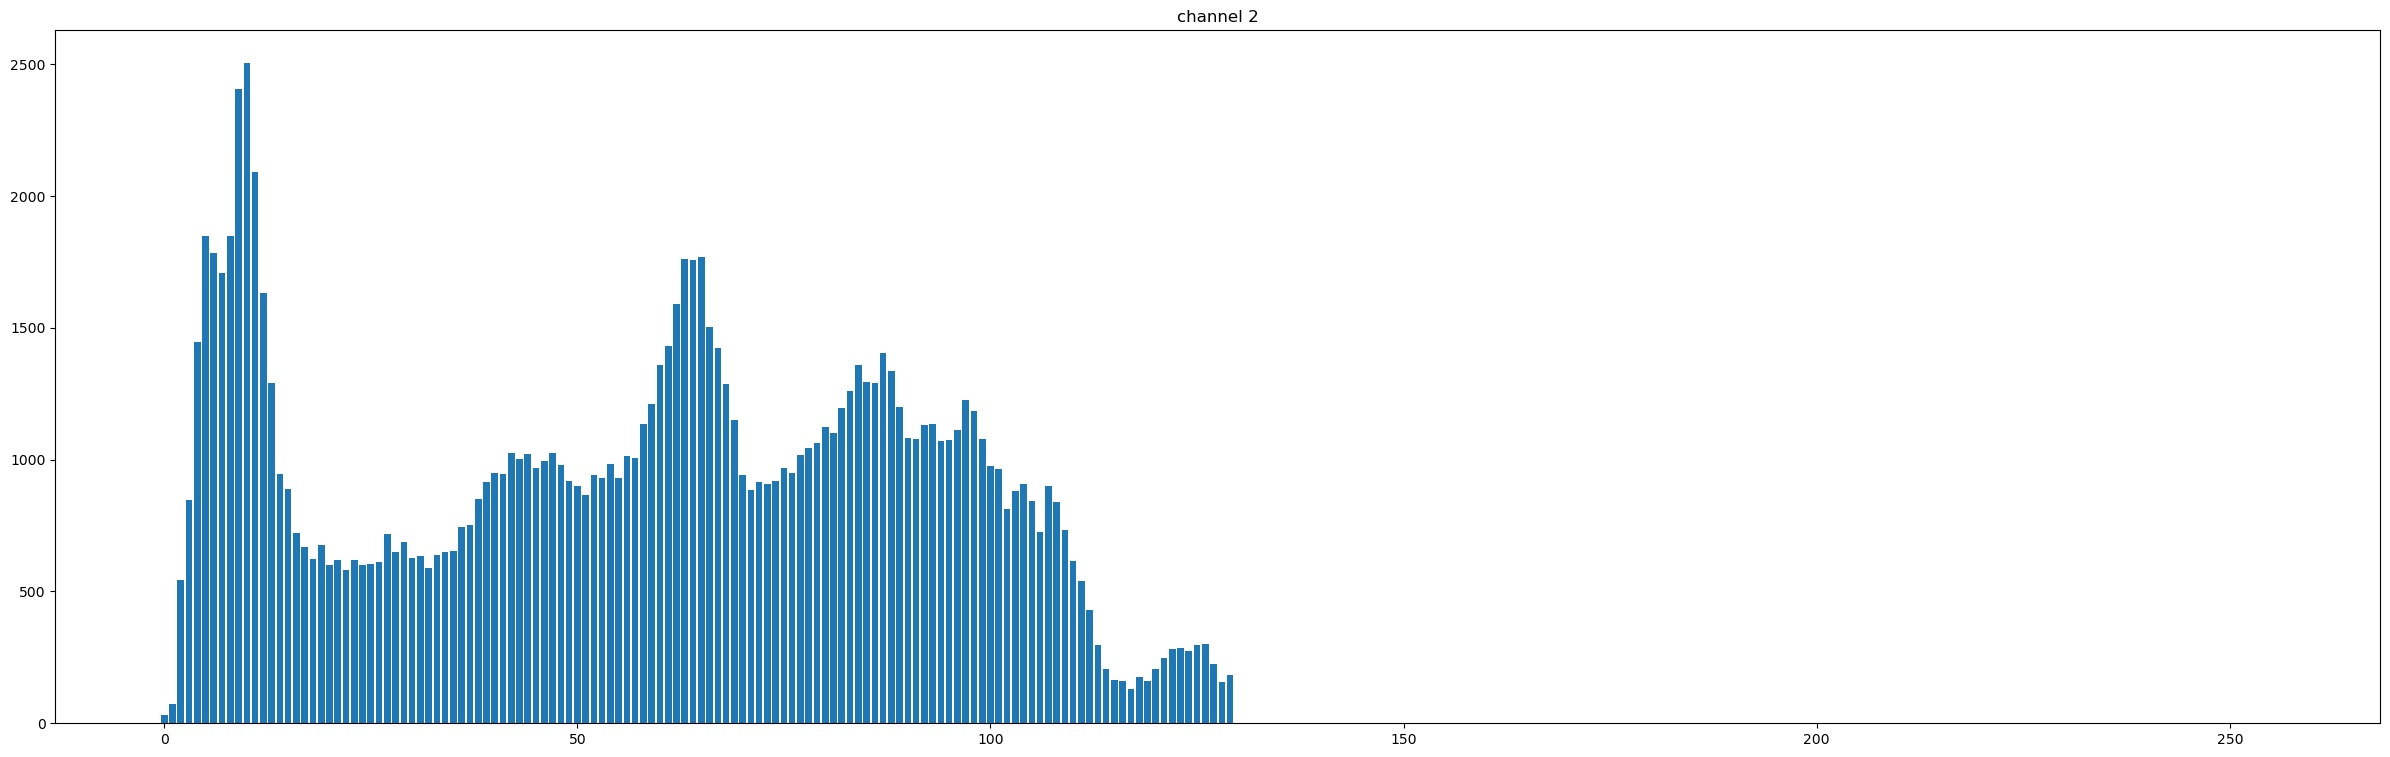

In [8]:
imhist3(I)

# Don't do this!!! Equalize each RGB channel

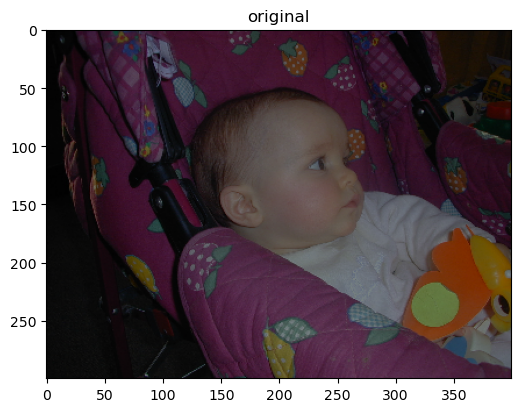

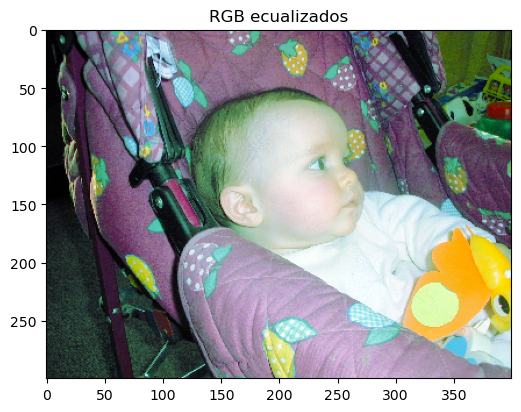

In [9]:
J = I.copy()
J[:,:,0] = cv2.equalizeHist(I[:,:,0])
J[:,:,1] = cv2.equalizeHist(I[:,:,1])
J[:,:,2] = cv2.equalizeHist(I[:,:,2])
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(J, cv2.COLOR_BGR2RGB))
plt.title('RGB ecualizados')
plt.show()

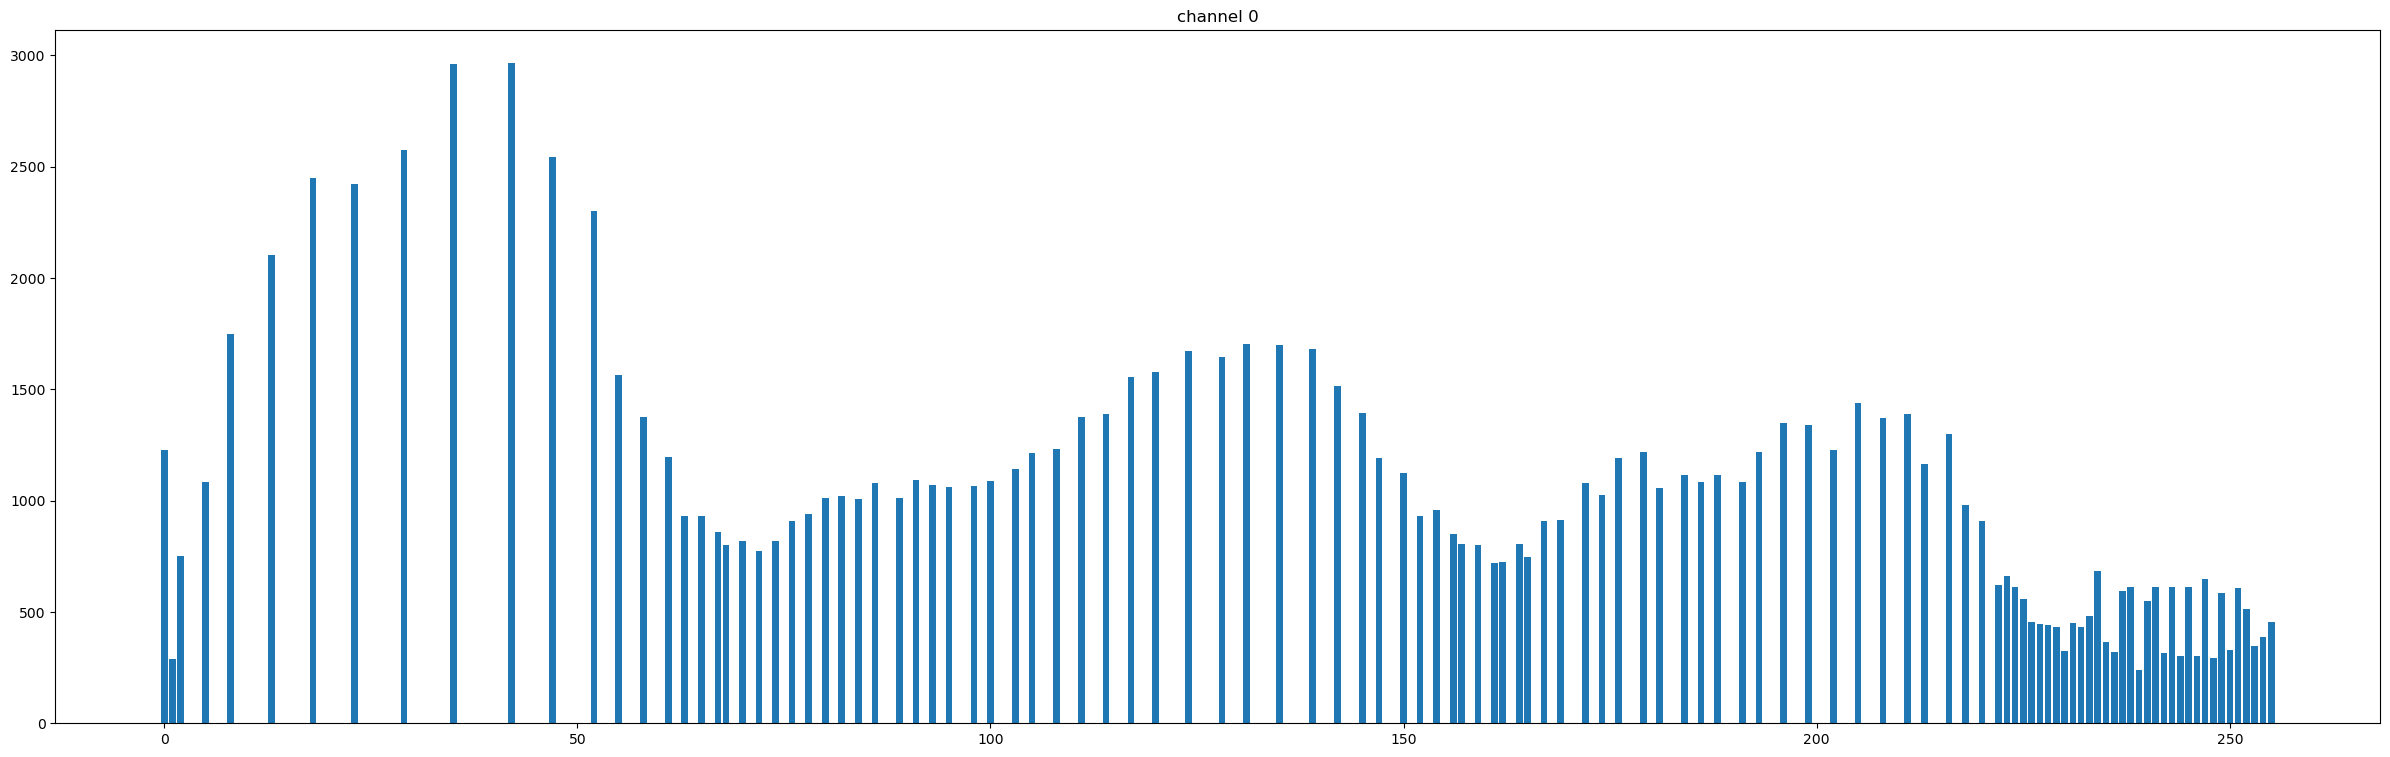

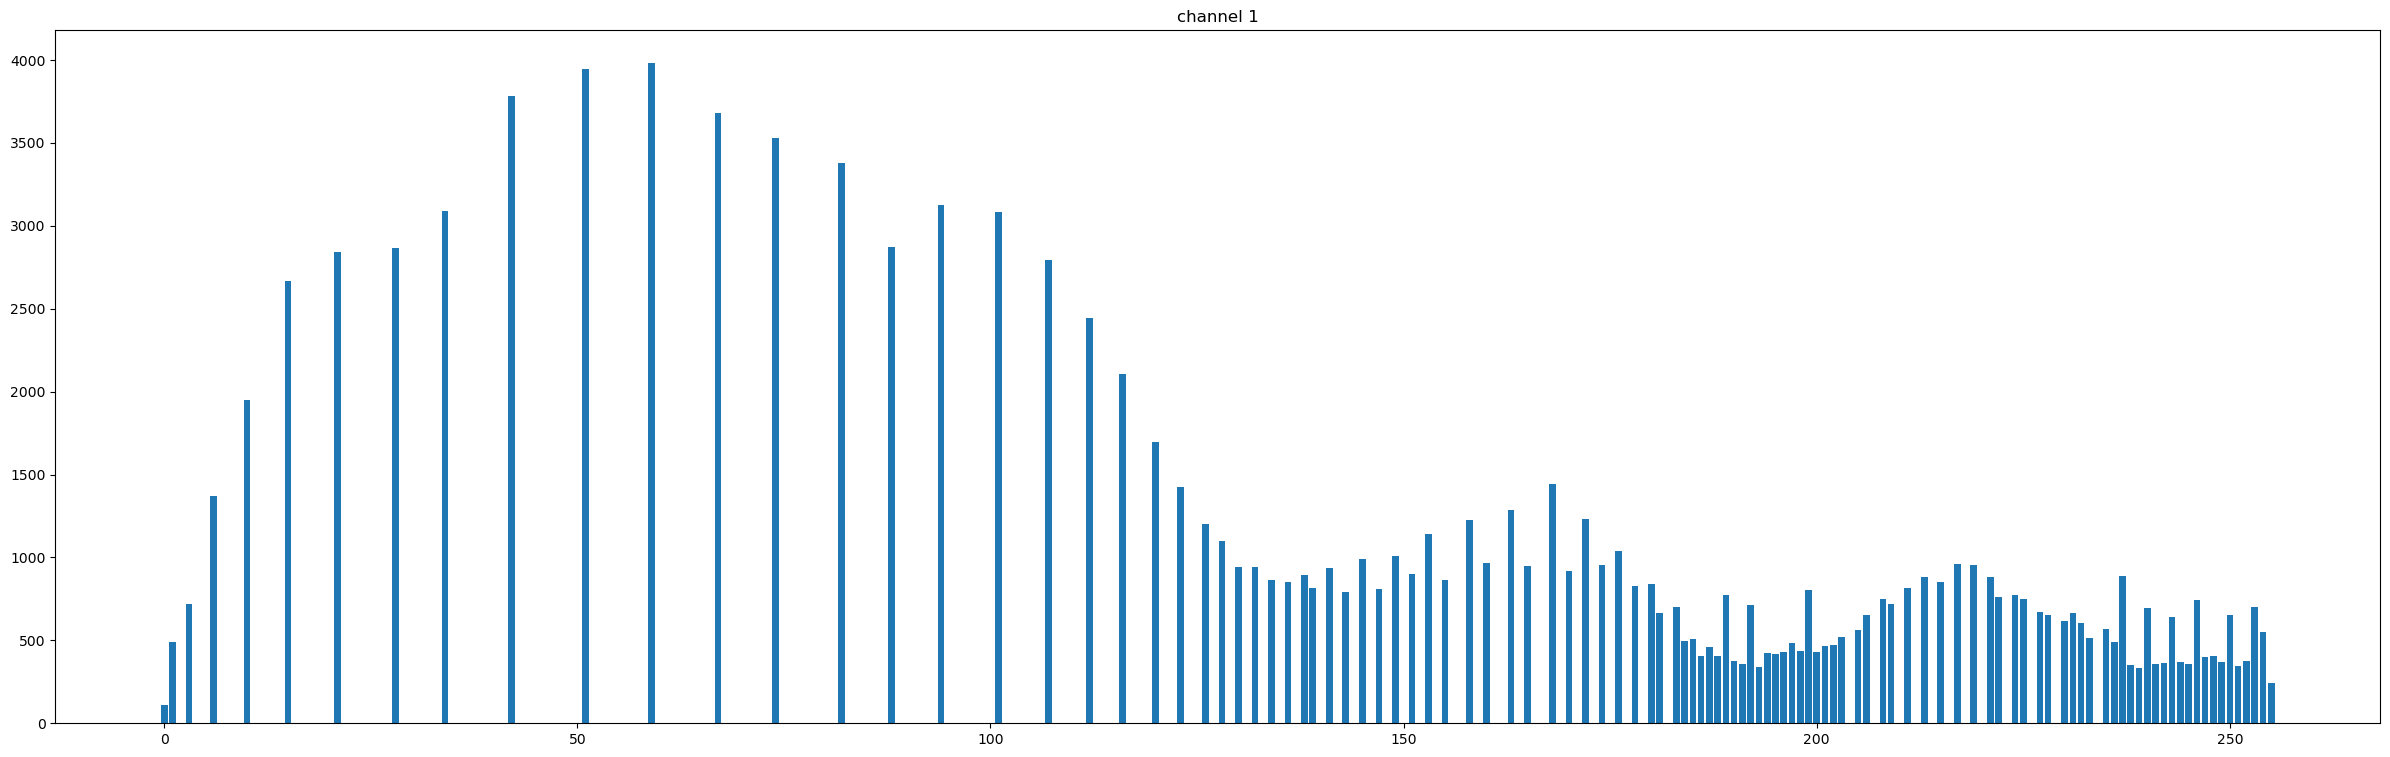

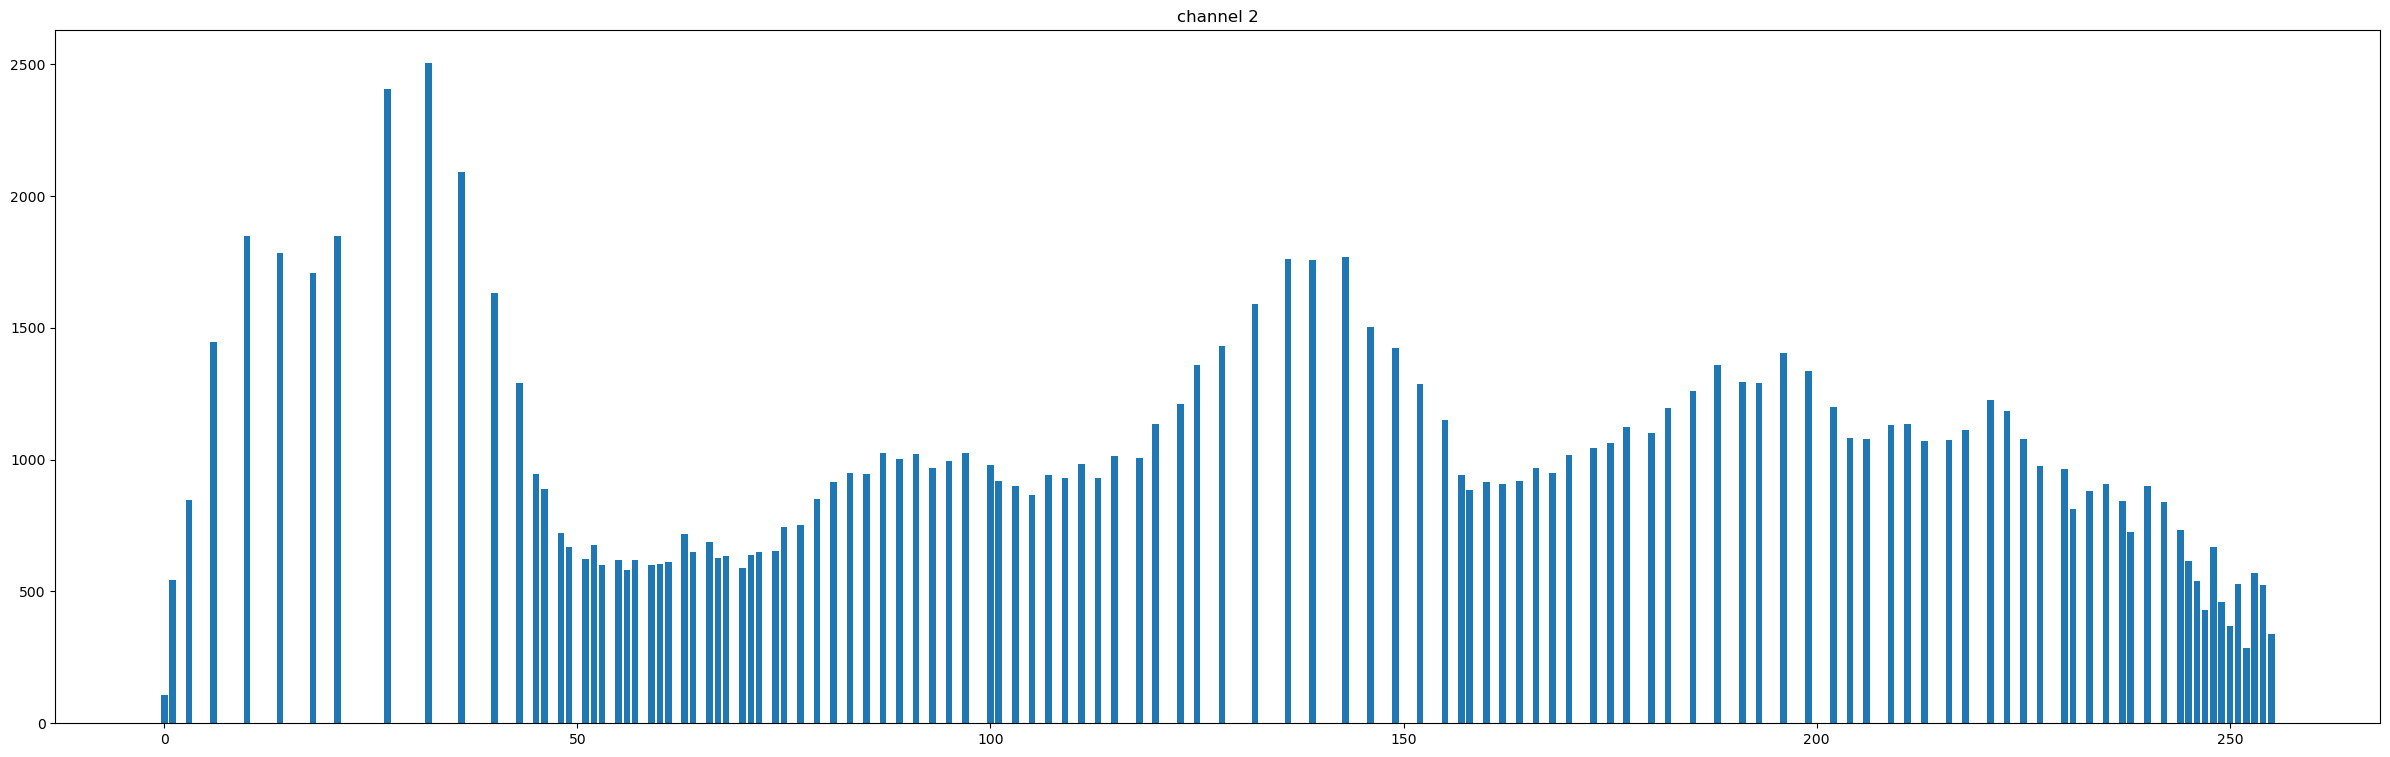

In [10]:
imhist3(J)

# Do this!!: Equalize only V channel (of HSV image)

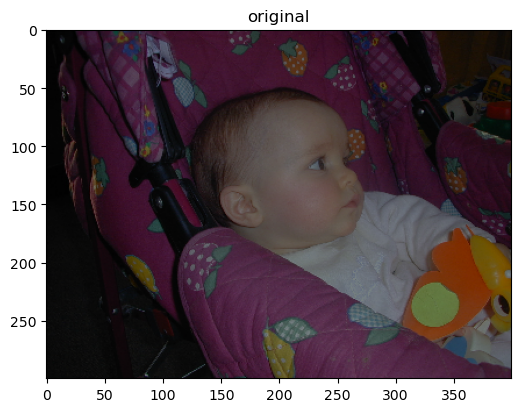

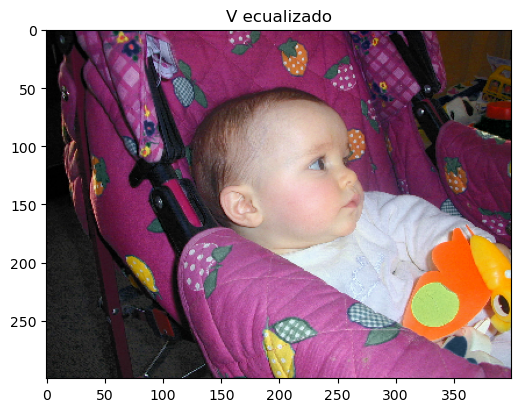

In [11]:
K = I.copy()
Khsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)
Khsv[:,:,2] = cv2.equalizeHist(K[:,:,2])
Knew = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))
plt.title('V ecualizado')
plt.show()

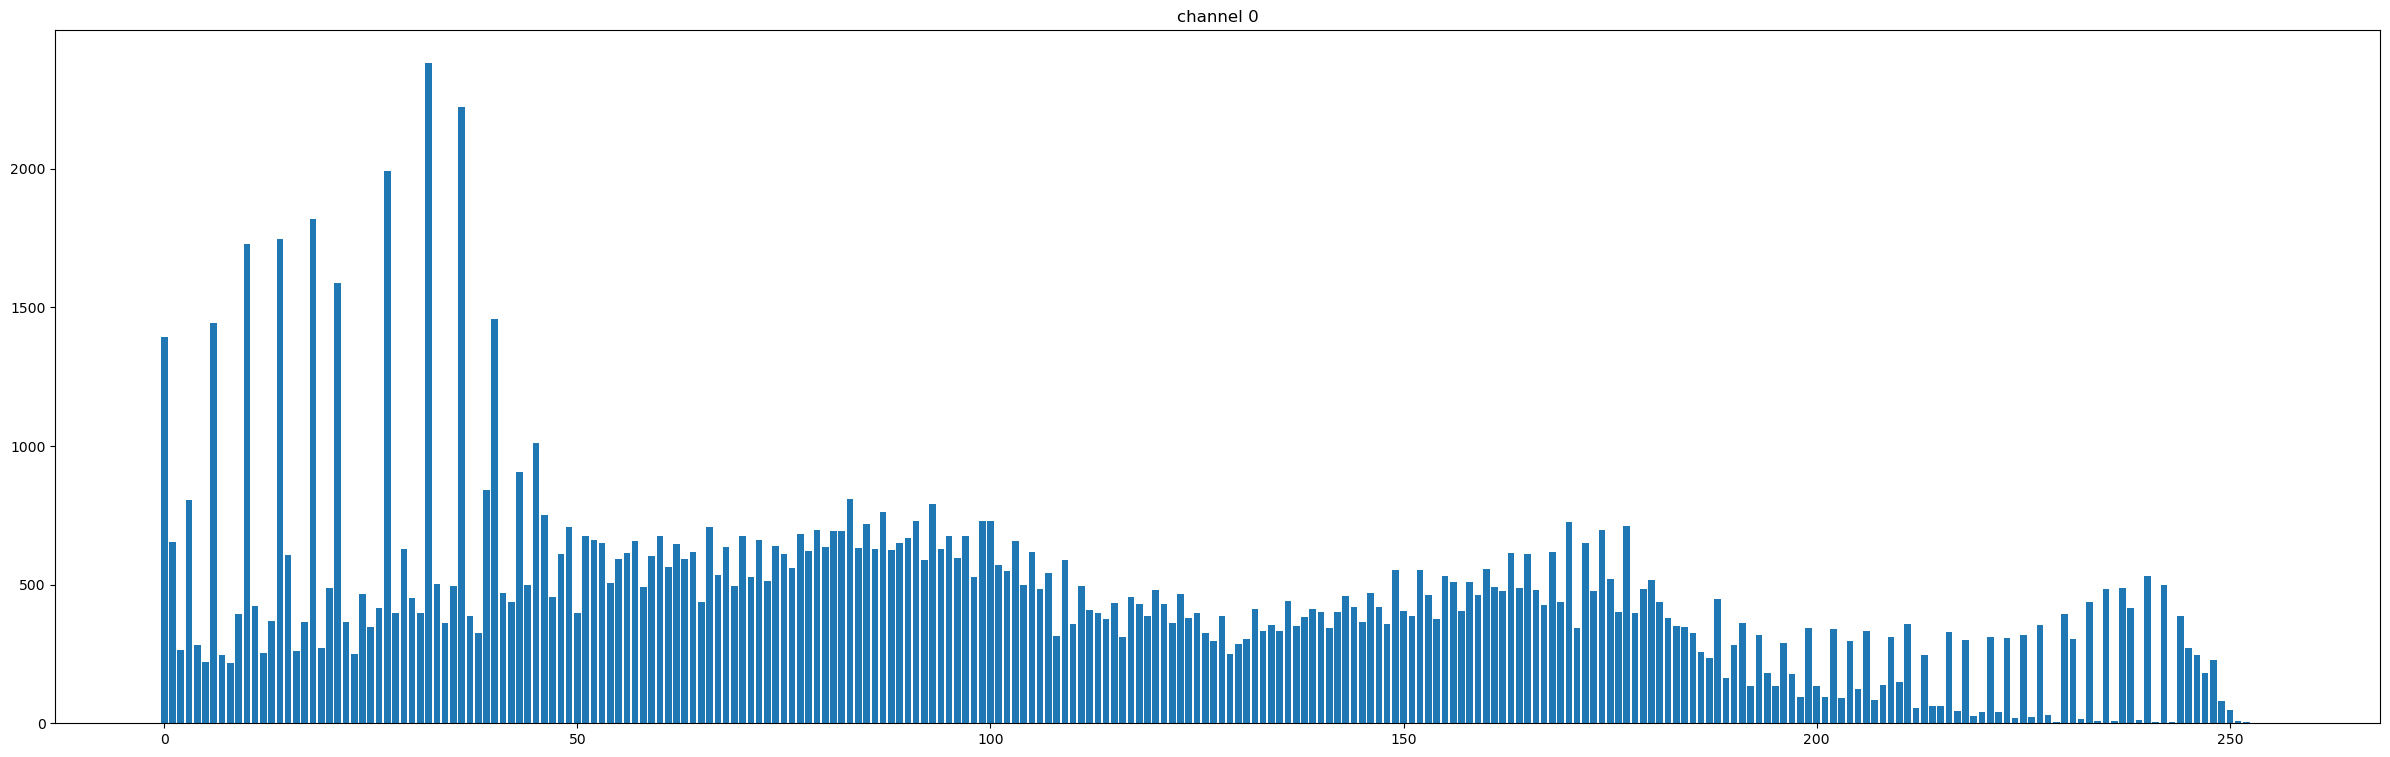

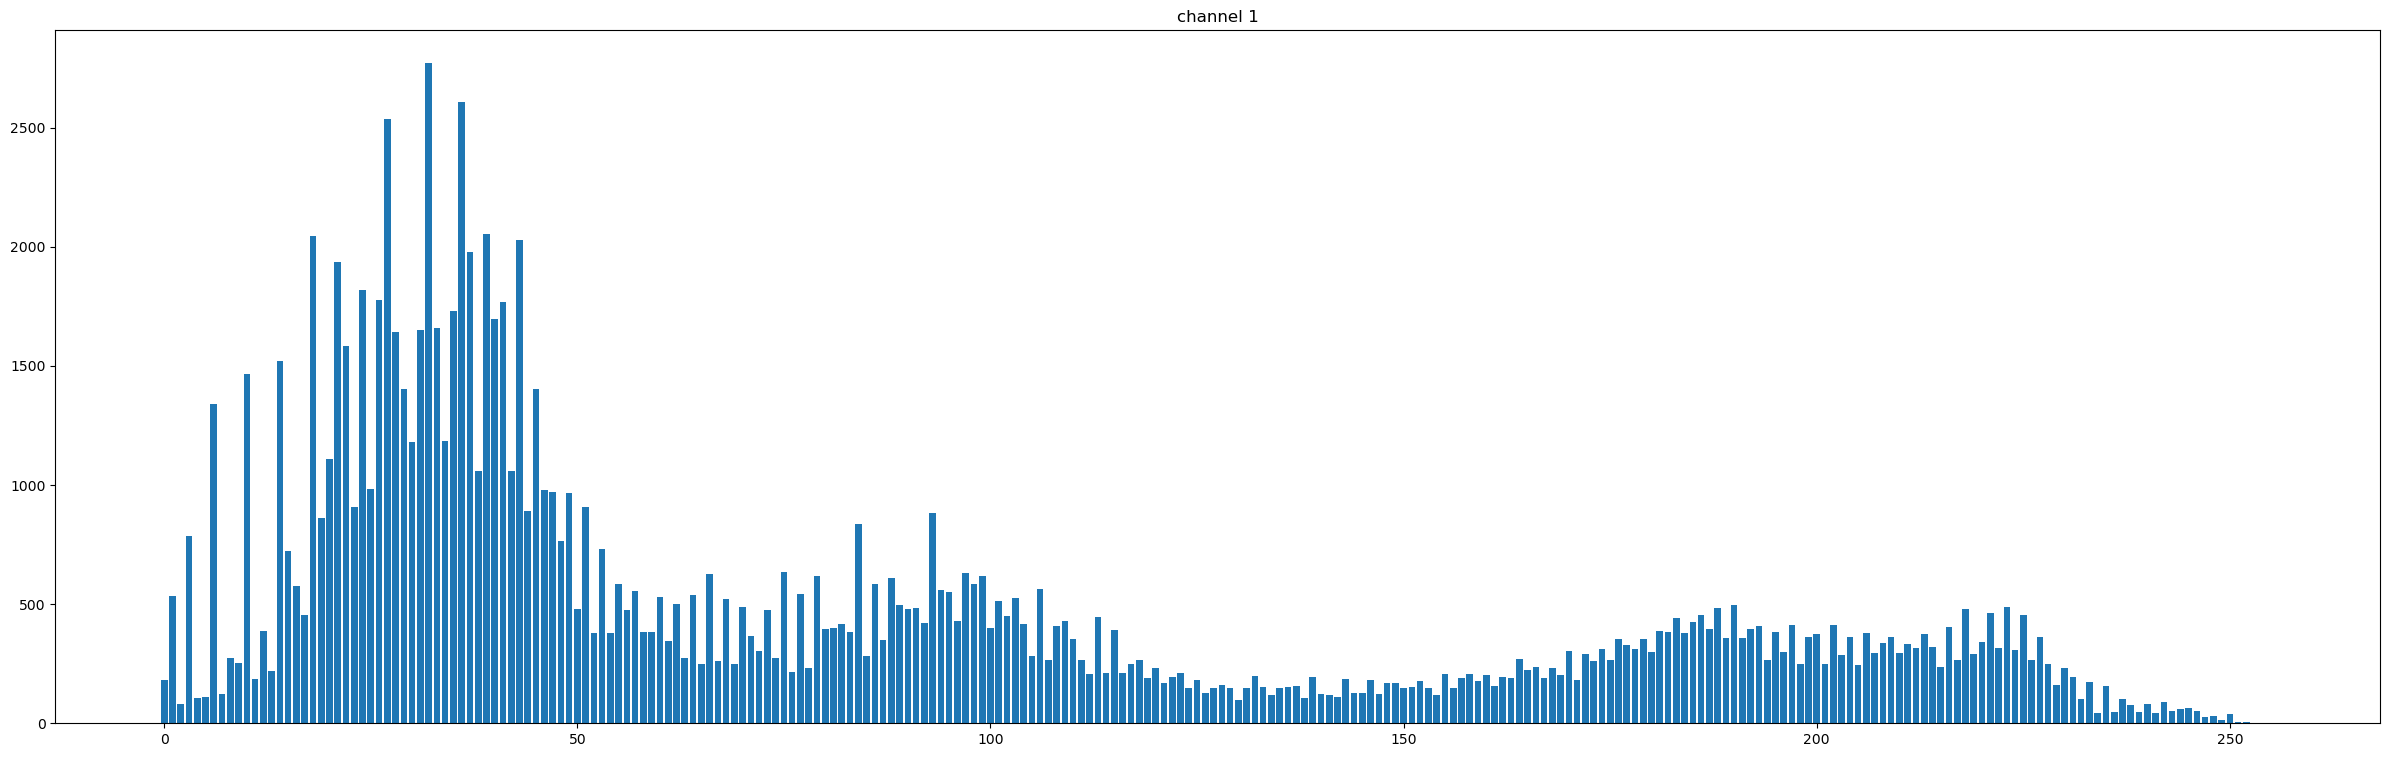

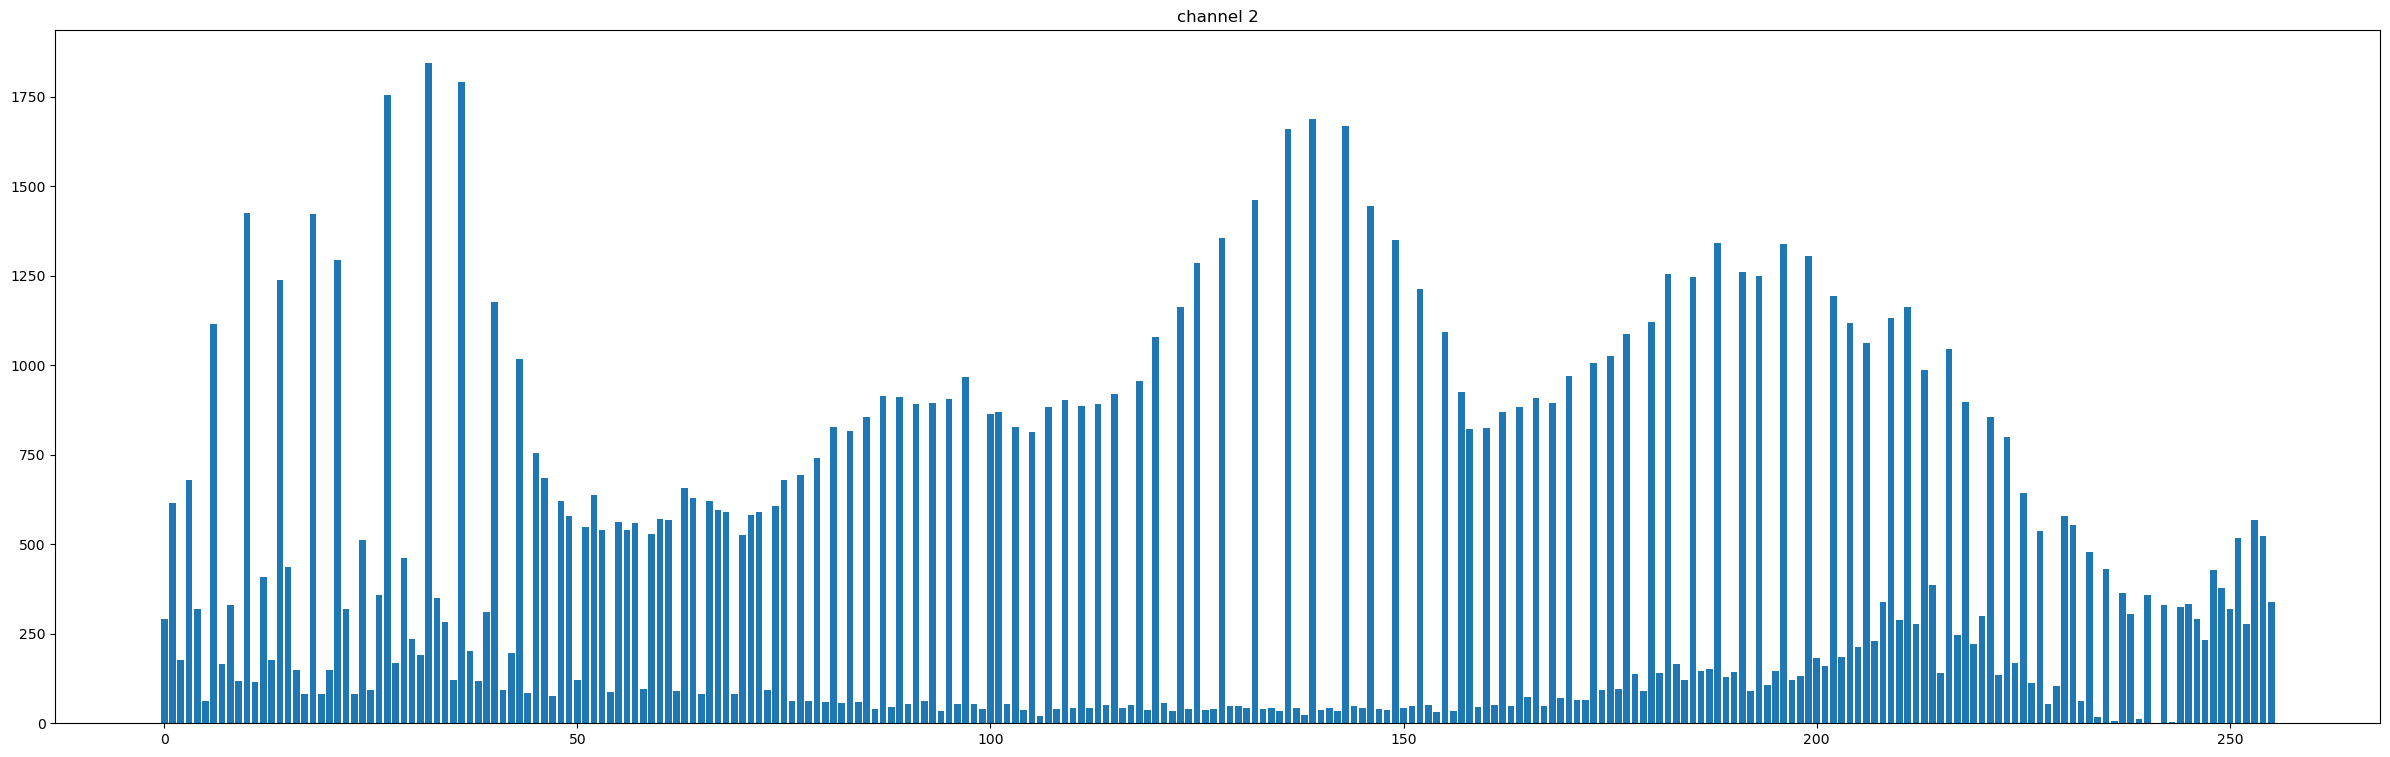

In [12]:
imhist3(Knew)

# Conversion a Lab

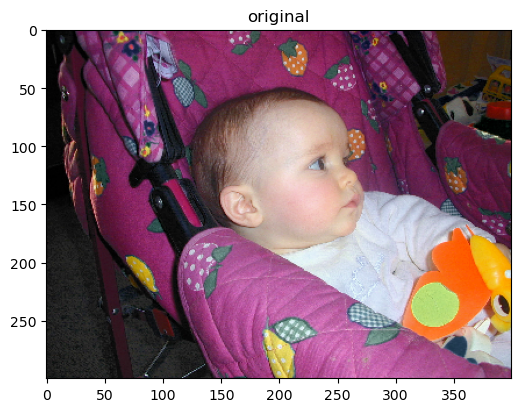

95


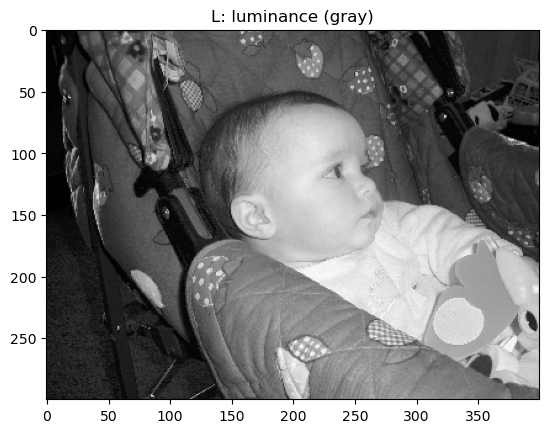

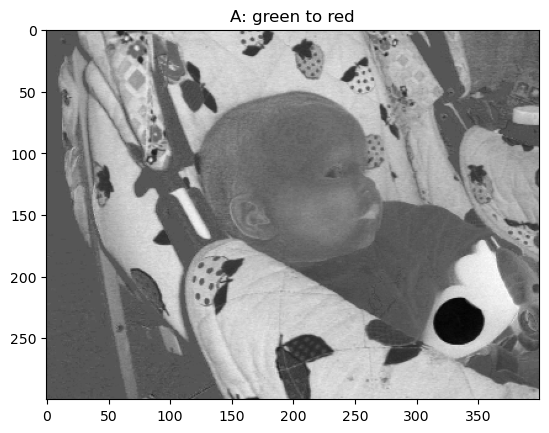

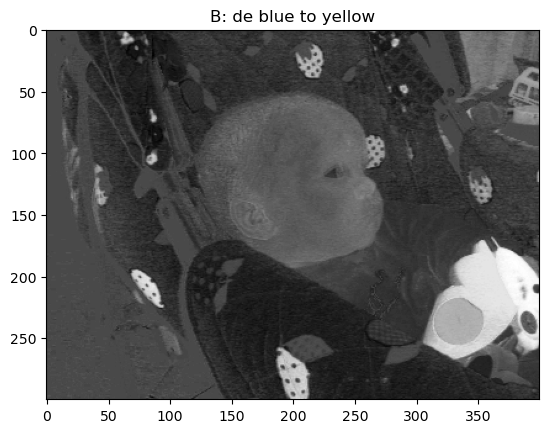

In [13]:
plt.figure(figsize=(6,9))
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.show()

lab_image = cv2.cvtColor(Knew, cv2.COLOR_BGR2LAB)

L,A,B = cv2.split(lab_image)

print(np.min(A))

plt.imshow(L,cmap='gray')
plt.title('L: luminance (gray)')
plt.show()

plt.imshow(A,cmap='gray')
plt.title('A: green to red')
plt.show()

plt.imshow(B,cmap='gray')
plt.title('B: de blue to yellow')
plt.show()
